# Spatialization

<p align="center">
<iframe width="560" height="315" src="https://www.youtube.com/embed/FTQbiNvZqaY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</p>

```{dropdown} Video not working?
Here is a <a href="">OneDrive link</a> to the full video.
<a href=""></a>
```

If we have access to a stereo mixture, we can leverage the "locations" of different sources to isolate them individually. For example, if we have a mix with two sources and source A is panned hard left and source B is panned hard right (i.e., we only hear source A in our left ear and source B in our right), then it's simple to "separate" source A from source B by turning off the left or right channel.

This simple idea can be applied to more complex mixtures as well, and while the algorithms are a little bit more complex than just "turn off the left channel", the idea remains the same: by putting sources in a representation of the physical space in which the mixture was recorded, we can separate out sources only in a specfici location. This technique is called Spatialization, and the trick is finding a technique that can t


## DUET

Here we'll talk about the Degenerate Unmixing Estimation Technique, or DUET. DUET compares the relative difference in attenuation levels and sample delay between the two channels of a stereo signal and uses that information for separation.


In [1]:
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

import nussl

In [117]:
musdb = nussl.datasets.MUSDB18(download=True)
i = 39
item = musdb[i]
sources = [
    item['sources']['other'],
    item['sources']['vocals'],
    item['sources']['bass']
]

a = nussl.mixing.pan_audio_signal(sources[0], -10)
a_delays = [0 for _ in range(a.num_channels)]
a = nussl.mixing.delay_audio_signal(a, a_delays)
a.apply_gain(0.5)

b = nussl.mixing.pan_audio_signal(sources[1], 0)
b_delays = [50 for _ in range(b.num_channels)]
b = nussl.mixing.delay_audio_signal(b, b_delays)
b.apply_gain(0.8)

c = nussl.mixing.pan_audio_signal(sources[2], 10)
c_delays = [10 for _ in range(c.num_channels)]
c = nussl.mixing.delay_audio_signal(c, c_delays)
c.apply_gain(1.0)

mix = a + b + c



In [118]:
duet = nussl.separation.spatial.Duet(mix, num_sources=3)
estimates = duet()

In [119]:
attn_delay = duet.normalized_attenuation_delay_histogram


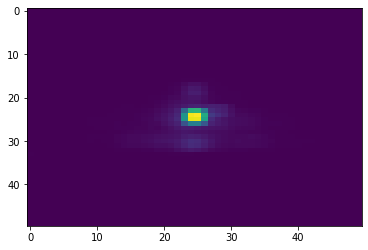

In [120]:
plt.imshow(duet.normalized_attenuation_delay_histogram, aspect='auto')

Text(0.5, 0, 'Weight')

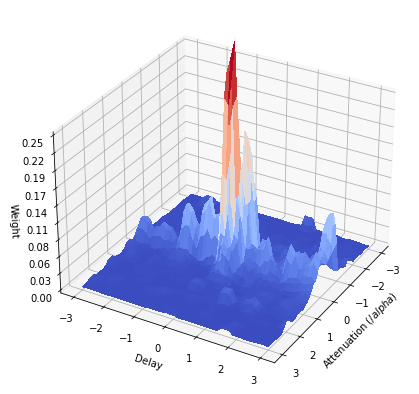

In [94]:
delay = np.linspace(duet.delay_min, duet.delay_max, duet.num_delay_bins)
attn = np.linspace(duet.attenuation_min, duet.attenuation_max, duet.num_attenuation_bins)

delay, attn = np.meshgrid(delay, attn)


fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.view_init(30, 30)
surf = ax.plot_surface(attn, delay, attn_delay, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(0.0, 0.25)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


ax.set_xlabel('Attenuation ($/alpha$)')
ax.set_ylabel('Delay')
ax.set_zlabel('Weight')

